<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necesssary libraries**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Importing the dataset**



In [5]:
# Header = none is initialised because the first transaction will be taken as the header otherwise
data = pd.read_csv("/content/Market_Basket_Optimisation (1).csv",header=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Exploratory Data Analysis**

In [6]:
data.head() #printing the first 5 rows

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info() #overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
data.describe() #how many unique elements are there and so on

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


**Data Visualisation**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


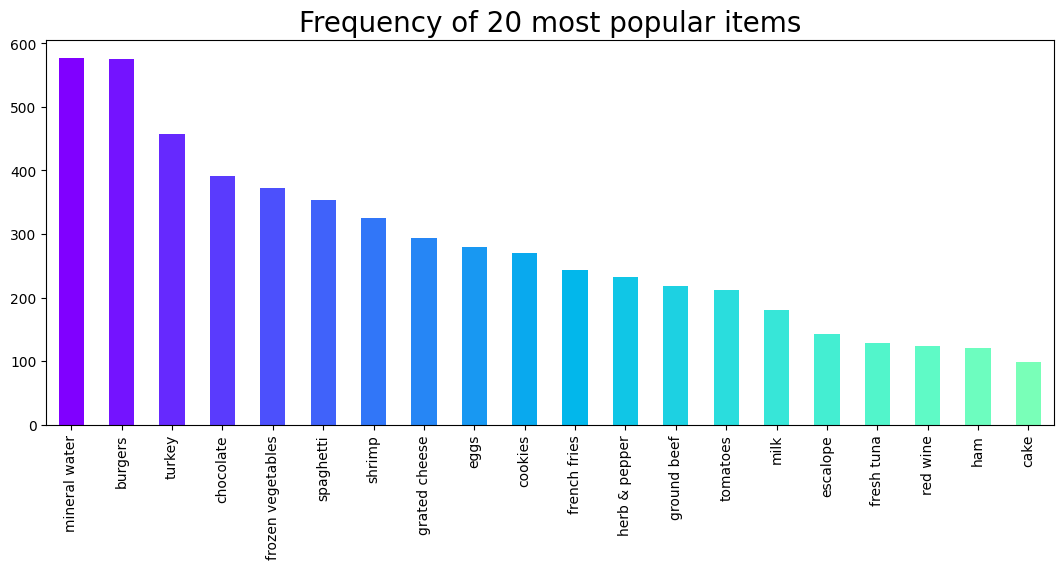

In [9]:
#Printing the top 20 items from the dataset using bar chart
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of 20 most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()
# As we can see, the top 3 items are mineral water, burgers and turkey respectively

**DATA PREPARATIONS**




In [10]:
# Preparing the data for further exploratory analysis
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**ONE- HOT ENCODER**



In [11]:
#Converting the dataset into a binary matrix format
# Call transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)
# Printing the one-hot encoded transaction dataset
onehot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


**Association Rule Mining using Apriori Algorithm**

In [35]:
# Running the apriori algorithm
frequent_itemsets = apriori(onehot,min_support = 0.02,use_colnames=True)
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


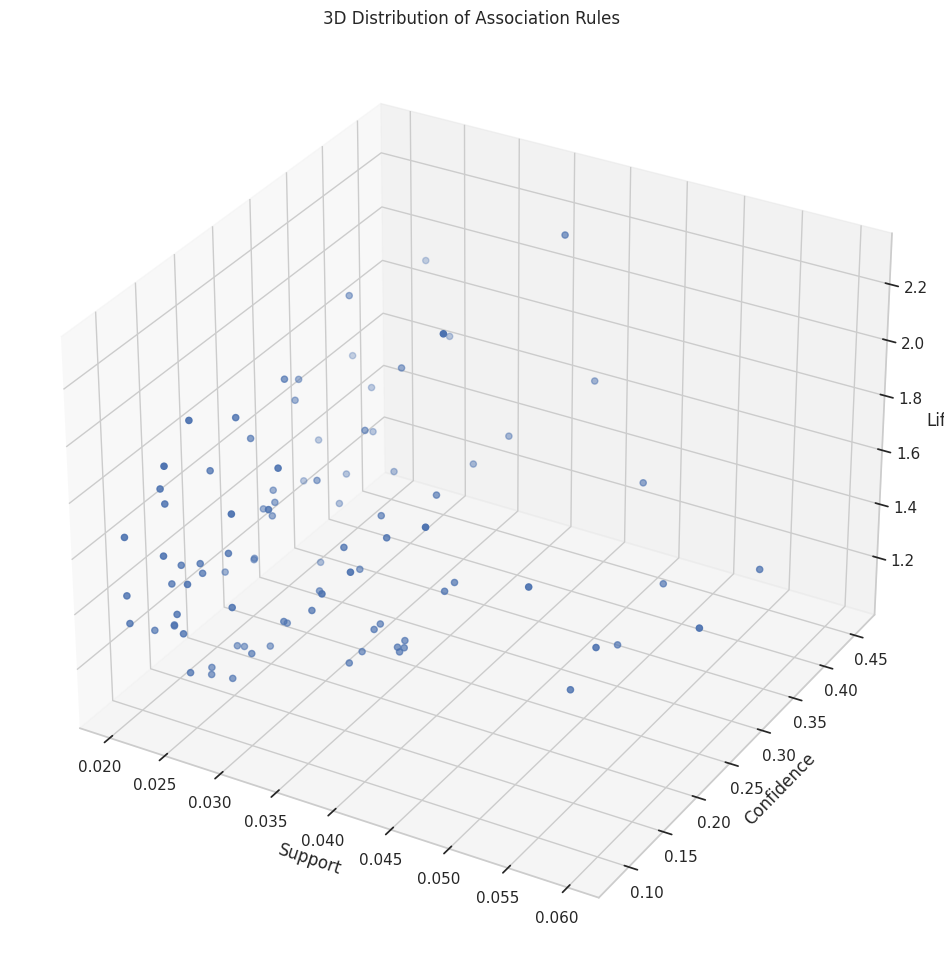

In [36]:
# This is the 3d distribution of association rules.
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
x = rules['support']
y = rules['confidence']
z = rules['lift']
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")
ax.scatter(x,y,z)
ax.set_title("3D Distribution of Association Rules")
plt.show()
# The values that are in the top are the best association rules with highest confidence, support and lift values

In [37]:
# Converting the frozenset to string attribute for better visualization
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
#Computing the best choices
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
      antecedents       consequents  confidence      lift
78           soup     mineral water    0.456464  1.914955
72      olive oil     mineral water    0.419028  1.757904
62    ground beef     mineral water    0.416554  1.747522
65    ground beef         spaghetti    0.398915  2.291162
28    cooking oil     mineral water    0.394256  1.653978
..            ...               ...         ...       ...
79  mineral water              soup    0.096756  1.914955
11  mineral water           chicken    0.095638  1.594172
51  mineral water   frozen smoothie    0.085011  1.342461
29  mineral water       cooking oil    0.084452  1.653978
85  mineral water  whole wheat rice    0.084452  1.442993

[94 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
best_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 78 to 85
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         94 non-null     object 
 1   consequents         94 non-null     object 
 2   antecedent support  94 non-null     float64
 3   consequent support  94 non-null     float64
 4   support             94 non-null     float64
 5   confidence          94 non-null     float64
 6   lift                94 non-null     float64
 7   leverage            94 non-null     float64
 8   conviction          94 non-null     float64
 9   zhangs_metric       94 non-null     float64
dtypes: float64(8), object(2)
memory usage: 8.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# Computing the list of frequent itemsets
itemsets = []
a = best_choice['antecedents'].astype('string')
b = best_choice['consequents'].astype('string')
itemsets = a + "," + b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Adding itemsets column to best_choice variable
best_choice['itemsets'] = itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
itemsets #printing the set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


78                soup,mineral water
72           olive oil,mineral water
62         ground beef,mineral water
65             ground beef,spaghetti
28         cooking oil,mineral water
                   ...              
79                mineral water,soup
11             mineral water,chicken
51     mineral water,frozen smoothie
29         mineral water,cooking oil
85    mineral water,whole wheat rice
Length: 94, dtype: string

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


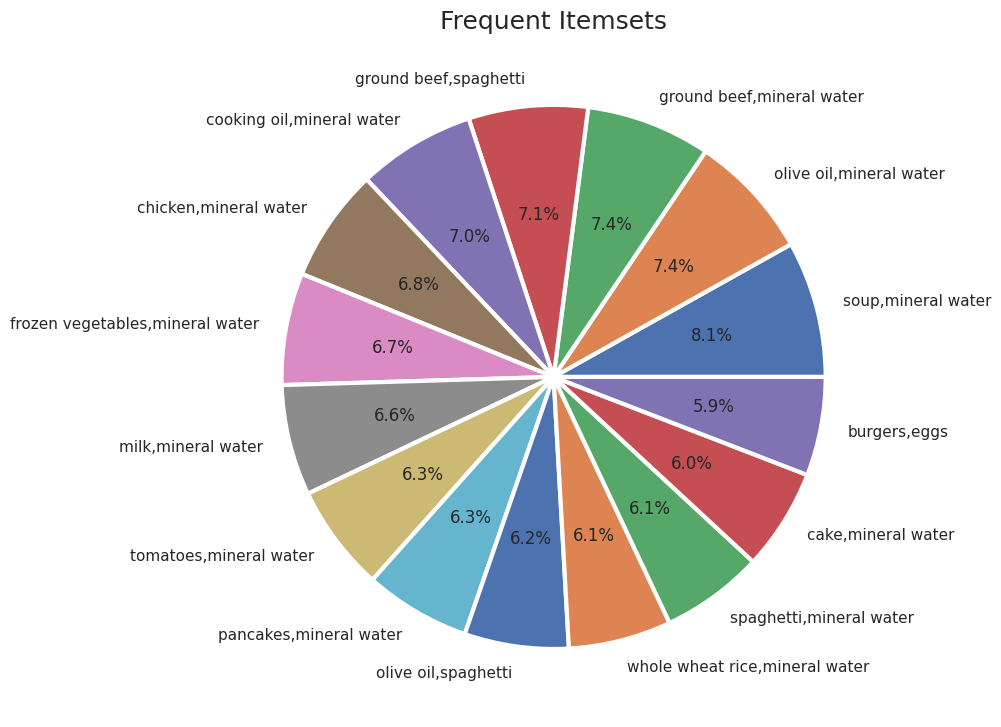

In [43]:
#Plotting the top 15 frequent itemsets using pie chart
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(best_choice['confidence'].head(15),labels=best_choice['itemsets'].head(15), autopct= '%.1f%%',wedgeprops = {'linewidth':3.0,'edgecolor':'white'})
ax.set_title("Frequent Itemsets",fontsize = 18)
plt.tight_layout()
plt.show()

In [44]:
best_choice

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,itemsets
78,soup,mineral water,0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,"soup,mineral water"
72,olive oil,mineral water,0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536,"olive oil,mineral water"
62,ground beef,mineral water,0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369,"ground beef,mineral water"
65,ground beef,spaghetti,0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,"ground beef,spaghetti"
28,cooking oil,mineral water,0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,0.416672,"cooking oil,mineral water"
...,...,...,...,...,...,...,...,...,...,...,...
79,mineral water,soup,0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330,"mineral water,soup"
11,mineral water,chicken,0.238368,0.059992,0.022797,0.095638,1.594172,0.008497,1.039415,0.489364,"mineral water,chicken"
51,mineral water,frozen smoothie,0.238368,0.063325,0.020264,0.085011,1.342461,0.005169,1.023701,0.334938,"mineral water,frozen smoothie"
29,mineral water,cooking oil,0.238368,0.051060,0.020131,0.084452,1.653978,0.007960,1.036472,0.519145,"mineral water,cooking oil"


In [45]:
rules['lhs'] = rules['antecedents'].apply(lambda x:len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
#Creating pivot table for better visualisation using confidence value
pivot = rules[rules['lhs']>1].pivot_table(index='antecedents',columns='consequents',values='confidence',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,burgers,cake,chicken,chocolate,cooking oil,eggs,french fries,frozen smoothie,frozen vegetables,green tea,...,low fat yogurt,milk,mineral water,olive oil,pancakes,shrimp,soup,spaghetti,tomatoes,whole wheat rice
antecedents,,,,,,,,,,,,,,,,,,,,,
burgers,0.000000,0.000000,0.000000,0.000000,0.000000,0.330275,0.252294,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.279817,0.000000,0.000000,0.000000,0.000000,0.246177,0.000000,0.000000
cake,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.338816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chicken,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chocolate,0.000000,0.000000,0.000000,0.000000,0.000000,0.202604,0.209927,0.000000,0.139951,0.143206,...,0.000000,0.196094,0.321400,0.000000,0.000000,0.000000,0.000000,0.239219,0.000000,0.000000
cooking oil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.394256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
eggs,0.160237,0.000000,0.000000,0.184718,0.000000,0.000000,0.202522,0.000000,0.120920,0.141691,...,0.000000,0.171365,0.283383,0.000000,0.120920,0.000000,0.000000,0.203264,0.000000,0.000000
french fries,0.128705,0.000000,0.000000,0.201248,0.000000,0.212949,0.000000,0.000000,0.000000,0.166927,...,0.000000,0.138846,0.000000,0.000000,0.117785,0.000000,0.000000,0.000000,0.000000,0.000000
frozen smoothie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozen vegetables,0.000000,0.000000,0.000000,0.240559,0.000000,0.227972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.247552,0.374825,0.000000,0.000000,0.000000,0.000000,0.292308,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


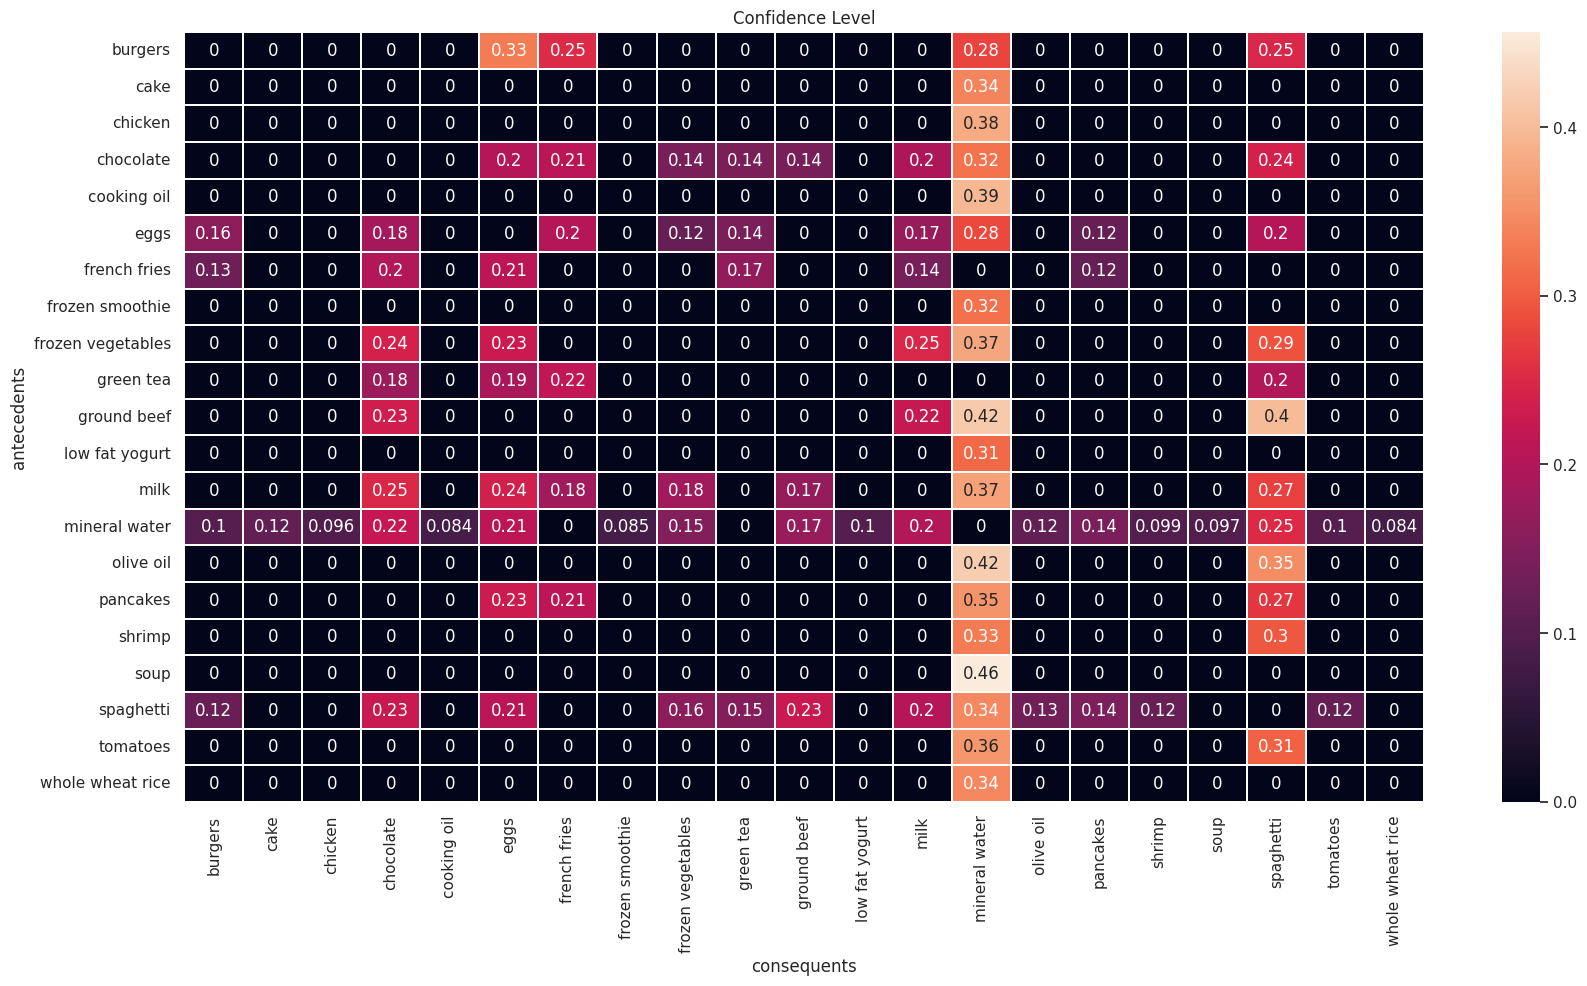

In [49]:
# Plotting the heatmap based on the confidence level
plt.figure(figsize=(20,10))
sns.heatmap(pivot,linewidths=0.3,annot=True)
plt.title("Confidence Level")
plt.show()

In [142]:
#Creating cross-selling matrix strategy
for i in pivot.values:
  for j in i:
    if j > 0.30:
      pivot.replace(j,"Maximum Association",inplace=True)
    elif j < 0.20 and j != 0:
      pivot.replace(j,"Minimum Association",inplace=True)
    elif j == 0:
      pivot.replace(j,"No Association",inplace=True)
    else:
      pivot.replace(j,"Medium Association",inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CROSS-SELLING MATRIX STRATEGY

In [143]:
# We can see that a matrix has been shown where the variables with no association, minimum, medium and maximum association is shown
pivot.toframe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,chocolate,eggs,frozen vegetables,ground beef,milk,mineral water,olive oil,pancakes,spaghetti
antecedents,,,,,,,,,
"frozen vegetables, milk",No Association,No Association,No Association,No Association,No Association,Maximum Association,No Association,No Association,No Association
"ground beef, chocolate",No Association,No Association,No Association,No Association,No Association,Maximum Association,No Association,No Association,No Association
"mineral water, chocolate",No Association,Medium Association,No Association,Medium Association,Medium Association,No Association,No Association,No Association,Maximum Association
"mineral water, french fries",No Association,No Association,No Association,No Association,No Association,No Association,No Association,No Association,Maximum Association
"mineral water, frozen vegetables",No Association,No Association,No Association,No Association,Maximum Association,No Association,No Association,No Association,Maximum Association
"mineral water, ground beef",Medium Association,Medium Association,No Association,No Association,Medium Association,No Association,No Association,No Association,Maximum Association
"mineral water, pancakes",No Association,No Association,No Association,No Association,No Association,No Association,No Association,No Association,Maximum Association
"mineral water, spaghetti",Medium Association,Medium Association,Medium Association,Medium Association,Medium Association,No Association,Minimum Association,Minimum Association,No Association
"olive oil, mineral water",No Association,No Association,No Association,No Association,No Association,No Association,No Association,No Association,Maximum Association


In [50]:
#Creating a pivot table using support values
pivots = rules[rules['lhs']>1].pivot_table(index='antecedents',columns='consequents',values='support',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


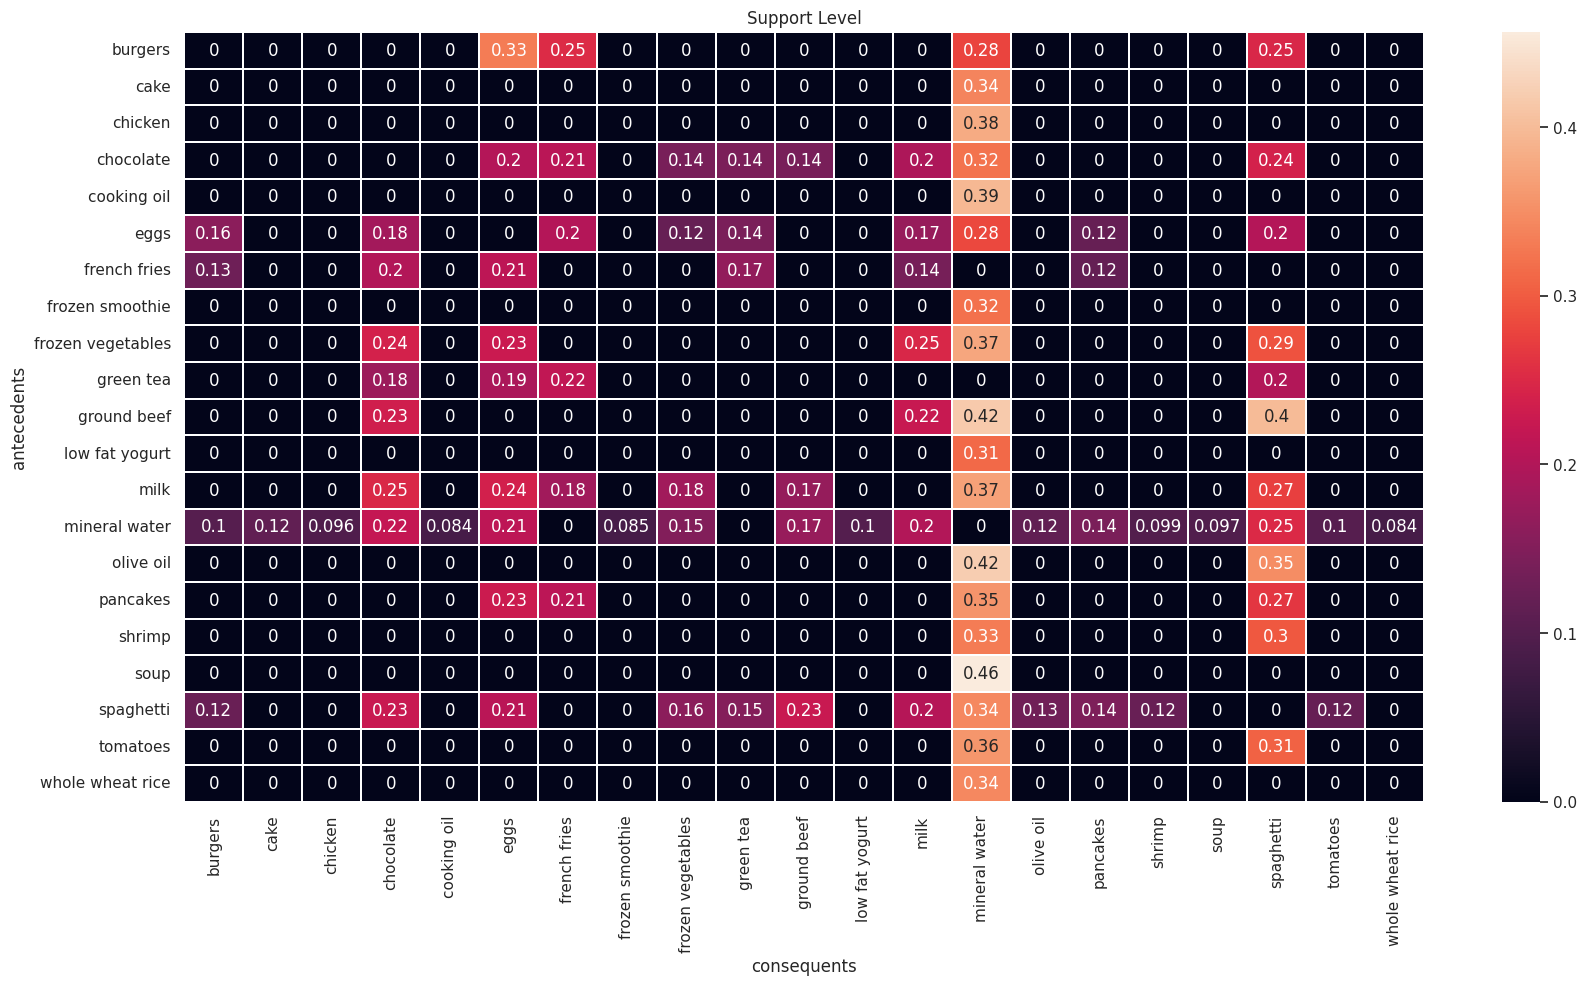

In [51]:
# Plotting the heatmap based on the support level
plt.figure(figsize=(20,10))
sns.heatmap(pivot,linewidths=0.3,annot=True)
plt.title("Support Level")
plt.show()

**Building a Recommender System**

In [52]:
bought = rules['antecedents']
buy = rules['consequents']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
new = list(zip(bought,buy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df = pd.DataFrame(new,columns=['Bought_Item',"Expected to be Bought"])
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bought_Item,Expected to be Bought
0,burgers,eggs
1,eggs,burgers
2,french fries,burgers
3,burgers,french fries
4,burgers,mineral water
5,mineral water,burgers
6,burgers,spaghetti
7,spaghetti,burgers
8,cake,mineral water
9,mineral water,cake
